<h1 text-align="center"><b><i>Practical Data Science</i></b></h1>

<h1><b>Task I: Data Preparation</b></h1>

<h4><b>1. Importing </b></h4>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [3]:
# import data
df = pd.read_csv('bank.txt', sep='\t')
# print data
print(f'Original Shape of data: {df.shape}')
df

Original Shape of data: (4119, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
# in here we would spread out all the valid value of data with object type
# which be considered before in the document
valid_value = {
    "job": ["admin", "blue-collar", "entrepreneur", "housemaid", 
"management", "retired", "self-employed", "services", "student", "technician", "unemployed", 
"unknown"],
    "marital": ["divorced", "married", "single", "unknown"],
    "education": ["basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", 
"professional.course", "university.degree", "unknown"],
    "default" : ["no", "yes", "unknown"],
    "housing" : ["no", "yes", "unknown"],
    "loan" : ["no", "yes", "unknown"],
    "contact" : ["cellular", "telephone"],
    "month": ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    "day_of_week" : ["mon", "tue", "wed", "thu", "fri"]
}

<h4><b>2. Data description</b></h4>
<p>The data contains 4119 samples and 21 attributes</p>

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4116.000000,4117.000000,4119.000000,4119.000000,4117.000000,4117.000000,4117.000000,4117.000000,4119.000000
mean,40.162661,256.838678,2.537284,960.422190,0.190337,0.085183,93.579449,-40.502308,3.620728,5166.481695
std,10.621359,254.745327,2.568759,191.922786,0.541788,1.563138,0.579190,4.593059,1.733778,73.667904
min,13.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,140.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<p>We can see the min duration is 0 that highly affects the output target so we need to drop this value</p>
<p>Now we check the values of one specific column</p>

In [6]:
df['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                572
professional.course     535
basic.4y                425
basic.6y                223
unknown                 167
basic .6y                 4
basic0.4y                 2
basic .4y                 2
basic .9y                 2
basic0.6y                 1
illiterate                1
Name: education, dtype: int64

-> Found that this column containing lot of typos error values, which would be considered to fix in several next steps

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4117 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4117 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

-> From this summary, it's easy to figure out that the data type of each columns is not to considerable, instead of that, the null value in some columns could be principal to take in next steps

<h4><b>3. Data errors detection</b></h4>

In [8]:
# from now all the error index found would be stored in this variables 
global list_error_index
list_error_index = []

<p>First we need to process the values 0 of duration</p>

In [9]:
# get error index of column duration that make column y be missunderstand
error_index = df[(df["duration"]==0) & (df["y"]=='yes')].index
list_error_index.append(error_index)
# df.drop(error_index, inplace=True)
print(f"There be {error_index.size} error(s) had been occured")

There be 0 error(s) had been occured


In [10]:
total_na_occur = 0
for col in df.columns:
    error_index = df.loc[df[col]=='na'].index
    list_error_index.append(error_index)
    total_na_occur += error_index.size
print(f"There be {total_na_occur} error(s) had been occured")

There be 4 error(s) had been occured


<p>Next we correct the typos error columns</p>

In [11]:
# function that would compare the typos error word and fix it whether it is approximate with the valid values above
def auto_fix(error, valid):
    if (not error or error=="na"): return error
    anchor, percent = error, 0
    for value in valid:
        try:
            s = sum([1 if char in value else 0 for char in error])
            if (s*100/len(value)>percent): 
                anchor = value
                percent = s*100/len(value)
        except: continue
    return anchor

error = "basic0. 4y"
print("Example:", error, "of column education change to =>", auto_fix(error, valid_value["education"]))

def typos_treatment(df, valid_value, total_error_occur):
    for key, val in valid_value.items():
        index = df[~df[key].isin(val)].index
        error_list = list(df.iloc[index][key].unique())
        total_error_occur += len(error_list)
        for error in error_list:
            df[key] = pd.Series(df[key].replace(error, auto_fix(error, valid_value[key])))
    return df, total_error_occur

df, total_error_occur = typos_treatment(df, valid_value, 0)
print(f"Total errors have been fixed: {total_error_occur}")
df

Example: basic0. 4y of column education change to => basic.4y
Total errors have been fixed: 19


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin,married,high.school,no,yes,no,telephone,jul,fri,...,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2.0,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin,married,high.school,no,no,no,cellular,aug,fri,...,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


<p><b>4. Export clean data to csv</b></p>

In [12]:
df.to_csv('bank.csv', sep=',', index=False)

<h1><b>Task II: Data Exploration</b></h1>

<p><b>Task 2.1: Choose 3 columns, 1 column with nominal values, 1 column with ordinal values,
and 1 column with numerical values. Then, use an appropriate graph to create a
visualization for each of them. Please give a short explanation why would you choose
those columns/attributes for visualisation?
</b></p>

In [13]:
df['job'].value_counts()

admin            1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      147
unemployed        111
housemaid         110
student            83
unknown            39
Name: job, dtype: int64

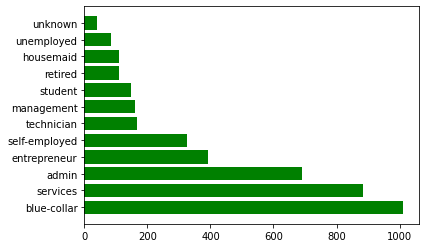

In [14]:
# nominal values
plt.barh(df['job'].unique(), width=df['job'].value_counts(), color="green")
plt.show()

<p>This graph displays that blue-collar as a revalent major of job that join in this campagin the most</p>

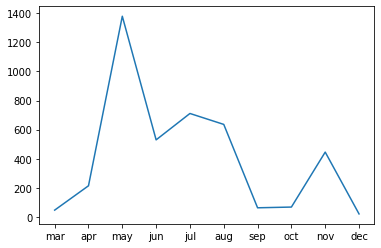

In [15]:
def sort_month(key):
    return valid_value['month'].index(key[0])

# ordered values
month_vals = dict(sorted(dict(df['month'].value_counts()).items(), key=sort_month))
plt.plot(month_vals.keys(), month_vals.values())
plt.show()

<p>The graph above displays the most user previous contancts is on May as well as the least is on March</p>

In [16]:
print([[x, len(df[x].unique())] for x in df.describe()])

[['age', 74], ['duration', 829], ['campaign', 26], ['pdays', 21], ['previous', 7], ['emp.var.rate', 11], ['cons.price.idx', 27], ['cons.conf.idx', 27], ['euribor3m', 235], ['nr.employed', 11]]


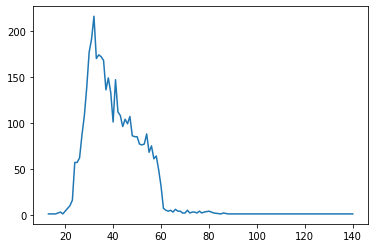

In [26]:
# numeric values
unique = list(df['age'].unique())
counts = (df['age'].value_counts())
counts = counts.sort_index()
plt.plot(counts.index, counts)
# df_merge = pd.merge(unique, counts, how="outer")

From above graph we could conclude that the range number of 30-40 years old play a key volume in the total of customers.

<p><b>Task 2.2: Explore the relationships between columns. You need to choose 3 pairs of columns to focus on, and you need to generate 1 visualisation for each pair. Each pair of columns that you choose should address a plausible hypothesis for the data concerned. Please give a short description for each hypothesis.
</b></p>

In [18]:
def getMeanValues(df, column_check, column_get):
    items = list(df[column_check].unique())
    values = [(mean(list(df.loc[df[column_check]==ite, column_get].dropna()))) for ite in items]
    return values, items

def getSumValues(df, column_check, column_get):
    items = list(df[column_check].unique())
    values = [(sum(list(df.loc[df[column_check]==ite, column_get].dropna()))) for ite in items]
    return values, items

<BarContainer object of 5 artists>

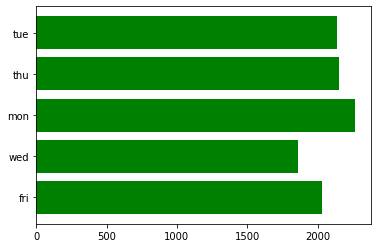

In [19]:
x, y = getSumValues(df, 'day_of_week', 'campaign')
plt.barh(y, x, color="green")

<font color="orange">This graph is combined by 2 columns of campaign and day_of_week, in which the values of campaign are sum on each day</font>

Assume the bar chart we could relize that the current total sum campaign that effectively prevalent in the day of Monday with the maximum value of contacts could take, instead of that, Wednesday could be the day that people tend to avoid the call than.

<font color="oval">Note: This type of combined data maybe affected by the Outliers</font>

=> This could lead directly to specific plan that the bank should focus their event in the day of weekends.

Text(0.5, 0, 'Age')

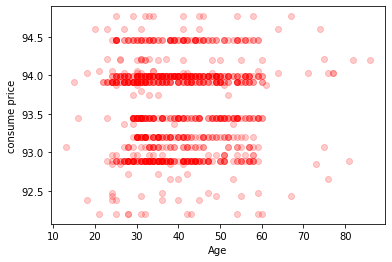

In [20]:
x = list(df['age'])
y = list(df['cons.price.idx'])
rg = len(x)//4
plt.scatter(x[:rg], y[:rg], alpha=0.2, color="red", cmap='viridis')
plt.ylabel("consume price")
plt.xlabel("Age")

<font color="orange">This graph is combined by 2 columns of age and cons.price.idx</font>

Aprroaching the alpha scatter chart, clearly that the age between 20-60 years old could be the most range of age consuming most value of price, which could be most in 93.0 to 94.0

=> In the result, the marketing plan should focus in the people of age range youngers, especially in 35 years old.

Text(0.5, 0, 'Last month contact')

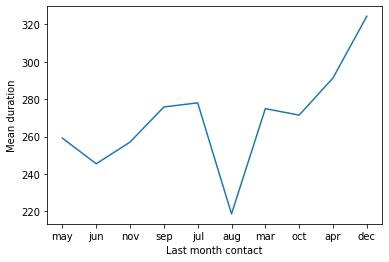

In [21]:
x, y = getMeanValues(df, 'month', 'duration')
rg = len(x)
plt.plot(y[:rg], x[:rg])
plt.ylabel("Mean duration")
plt.xlabel("Last month contact")

<font color="orange">This graph is combined by 2 columns of month and duration, in which duration has been switched to median values</font>

After calculating the mean value of duration in each month, we could get the information that despite the maximum contacts be in May, the most duration of particular call is in the September and March.

<font color="oval">Note: This type of combined data is affected significantly by the Outliers</font>

=> The event of campaign should focus on the Summer and Spring of seasons

<p><b>Task 2.3: Explore the relationships between columns. You need to choose 3 pairs of columns to
focus on, and you need to generate 1 visualisation for each pair. Each pair of columns
that you choose should address a plausible hypothesis for the data concerned. Please
give a short description for each hypothesis.
</b></p>

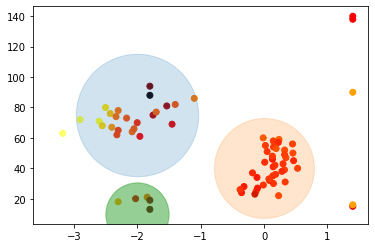

In [22]:
# Visualize the correlation of 3 columns, including [age], [emp.var.rate] and [cons.conf.idx]
x, y = getMeanValues(df, 'age', 'emp.var.rate')
z, y = getMeanValues(df, 'age', 'cons.conf.idx')
plt.scatter(x, y, alpha=1, c=z, cmap='hot')
plt.scatter(-2, 75, s=15000, alpha=0.2)
plt.scatter(0, 40, s=10000, alpha=0.2)
plt.scatter(-2, 10, s=4000, alpha=0.5, cmap="")

<font color="orange">This graph is combined by 3 columns of age, emp.var.rate and cons.conf.idx</font>

From the heat scatter graph, after treating value of employment variance and consumer confidence to the mean values depending on the unique value of age, we could observe that with the age of 40, customers have a tendency to be stable in the variance of employment due to their high confidence in life, in which, the age with less confidence is nearly 70 have less stability in the employment variance, which is as same as the age of below 20.

<h1><b>Task III: Dealing with Missing Values and Outliers</b></h1>
<p><b>1. Deal with missing values</b></p>


In [23]:
# Setup
missing_vals_df = df.copy()
missing_vals_df2 = df.copy()
nume_cols = df.select_dtypes(include=['float', 'int64']).columns

Mean

In [24]:
# replacing missing numeric values with mean value and drop missing object values 
for i in nume_cols:
    missing_vals_df[i] = missing_vals_df[i].fillna(missing_vals_df[i].mean())
# drop missing values of the object value
missing_vals_df = missing_vals_df.dropna()
# Export to bank_fix1.csv file
missing_vals_df.to_csv('bank_fix1.csv', sep=',')
print(missing_vals_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   float64
 11  campaign        4117 non-null   float64
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp.var.rate    4117 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

Median

In [25]:
for i in nume_cols:
    missing_vals_df2[i] = missing_vals_df2[i].fillna(missing_vals_df2[i].median())
# drop missing values of object
missing_vals_df2 = missing_vals_df2.dropna()
# Export to bank_fix2.csv file
missing_vals_df2.to_csv('bank_fix2.csv', sep=',')
print(missing_vals_df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4117 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4117 non-null   object 
 3   education       4117 non-null   object 
 4   default         4117 non-null   object 
 5   housing         4117 non-null   object 
 6   loan            4117 non-null   object 
 7   contact         4117 non-null   object 
 8   month           4117 non-null   object 
 9   day_of_week     4117 non-null   object 
 10  duration        4117 non-null   float64
 11  campaign        4117 non-null   float64
 12  pdays           4117 non-null   int64  
 13  previous        4117 non-null   int64  
 14  poutcome        4117 non-null   object 
 15  emp.var.rate    4117 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

- The outliers affect the standard deviation because it is calculated by the square root of the sum of x minus the mean squared and outliers affect the mean. The more extreme the outlier, the more standard deviation. 
- Sometimes an outlier has its meaning. We should not remove an outlier when it presents natural variation in the population.
- There are outliers in the columns age, duration,... When I looked at description of the data and visualized them, the graph.... 

# References
<p>https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html</p>